In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))
data_np=data.values.astype('float32')
data_tensor=torch.from_numpy(data_np)
print(data_tensor.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
torch.Size([506, 14])


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np


X_np = data.iloc[:, :-1].values.astype(np.float32)
y_np = data.iloc[:, -1].values.astype(np.float32).reshape(-1, 1)


scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_np)


scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_np)


X = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y_scaled, dtype=torch.float32)


In [36]:
X.shape, y.shape

(torch.Size([506, 13]), torch.Size([506, 1]))

In [63]:
class BasicNN(nn.Module):
    def __init__(self):
        super(BasicNN,self).__init__()
        self.fc1=nn.Linear(13,128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2=nn.Linear(128,128)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3=nn.Linear(128,128)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4=nn.Linear(128,1)
        
        self.relu=nn.ReLU()
    def forward(self, x):
        out=self.fc1(x)
        out=self.relu(out)
        out=self.dropout1(out)
        out=self.fc2(out)
        out=self.relu(out)
        out=self.dropout2(out)
        out=self.fc3(out)
        out=self.relu(out)
        out=self.dropout3(out)
        out=self.fc4(out)
        return out
    
        

In [88]:
model=BasicNN()
criterion=nn.MSELoss()
optimizer=optim.AdamW(model.parameters(), lr=0.01,weight_decay=1e-2)


In [94]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

c:\Users\vikra\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [98]:
epochs=5000
for epoch in range(epochs):
    model.train()
    outputs=model(X)
    loss=criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step(loss)
    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [50/5000], Loss: 0.0260
Epoch [100/5000], Loss: 0.0257
Epoch [150/5000], Loss: 0.0248
Epoch [200/5000], Loss: 0.0348
Epoch [250/5000], Loss: 0.0296
Epoch [300/5000], Loss: 0.0296
Epoch [350/5000], Loss: 0.0249
Epoch [400/5000], Loss: 0.0309
Epoch [450/5000], Loss: 0.0268
Epoch [500/5000], Loss: 0.0271
Epoch [550/5000], Loss: 0.0267
Epoch [600/5000], Loss: 0.0273
Epoch [650/5000], Loss: 0.0238
Epoch [700/5000], Loss: 0.0242
Epoch [750/5000], Loss: 0.0263
Epoch [800/5000], Loss: 0.0253
Epoch [850/5000], Loss: 0.0240
Epoch [900/5000], Loss: 0.0261
Epoch [950/5000], Loss: 0.0267
Epoch [1000/5000], Loss: 0.0255
Epoch [1050/5000], Loss: 0.0274
Epoch [1100/5000], Loss: 0.0277
Epoch [1150/5000], Loss: 0.0242
Epoch [1200/5000], Loss: 0.0223
Epoch [1250/5000], Loss: 0.0265
Epoch [1300/5000], Loss: 0.0271
Epoch [1350/5000], Loss: 0.0287
Epoch [1400/5000], Loss: 0.0278
Epoch [1450/5000], Loss: 0.0273
Epoch [1500/5000], Loss: 0.0289
Epoch [1550/5000], Loss: 0.0266
Epoch [1600/5000], Loss: 0.0

In [99]:
model.eval()
with torch.no_grad():
    y_pred = model(X).numpy()  # shape: [N, 1]
    y_true = y.numpy()

# Inverse transform (undo normalization)
y_pred_original = scaler_y.inverse_transform(y_pred)
y_true_original = scaler_y.inverse_transform(y_true)


In [100]:
model.eval()
with torch.no_grad():
    predictions = model(X)
    for i in range(len(X)):
        print(f"Input: {X[i].tolist()}, Prediction: {predictions[i].item():.2f}, Target: {y[i].item():.2f}")


Input: [-0.41978195309638977, 0.28482985496520996, -1.2879095077514648, -0.2725985646247864, -0.14421755075454712, 0.413671612739563, -0.1200135201215744, 0.14021366834640503, -0.9828428626060486, -0.6666082143783569, -1.4590002298355103, 0.4410519003868103, -1.0755622386932373], Prediction: 0.10, Target: 0.16
Input: [-0.4173392653465271, -0.48772236704826355, -0.5933809876441956, -0.2725985646247864, -0.7402621507644653, 0.19427447021007538, 0.3671664595603943, 0.5571599006652832, -0.867882490158081, -0.9873294830322266, -0.3030945658683777, 0.4410519003868103, -0.492439329624176], Prediction: -0.05, Target: -0.10
Input: [-0.4173416197299957, -0.48772236704826355, -0.5933809876441956, -0.2725985646247864, -0.7402621507644653, 1.282713532447815, -0.2658118009567261, 0.5571599006652832, -0.867882490158081, -0.9873294830322266, -0.3030945658683777, 0.39642685651779175, -1.2087273597717285], Prediction: 1.27, Target: 1.32
Input: [-0.416750431060791, -0.48772236704826355, -1.30687773227691

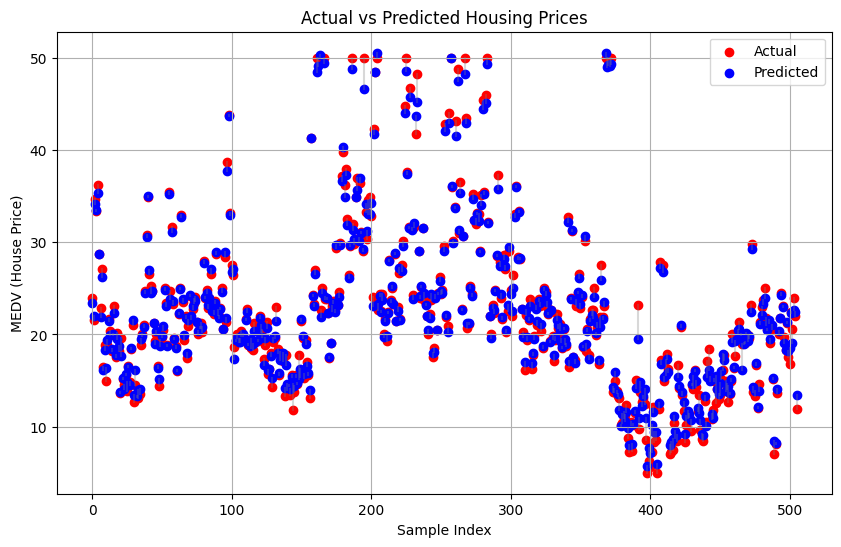

In [101]:
plt.figure(figsize=(10, 6))
for i in range(len(y_true_original)):
    plt.plot([i, i], [y_true_original[i], y_pred_original[i]], color='gray', alpha=0.3)

plt.scatter(x_axis, y_true_original, color='red', label='Actual')
plt.scatter(x_axis, y_pred_original, color='blue', label='Predicted')

plt.xlabel("Sample Index")
plt.ylabel("MEDV (House Price)")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.grid(True)
plt.show()


In [102]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_true_original, y_pred_original)
r2 = r2_score(y_true_original, y_pred_original)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.55
R² Score: 0.9931
